# European Social Survey

You should first get the Israeli data file from the ESS website. Grab the stata file here and extract to an appropriate directory: https://www.europeansocialsurvey.org/download.html?file=ESS8IL&c=IL&y=2016

Copyright 2018 Ehud Lamm

## Read data and sanity checks

Note: Working on unweighted data

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Read ESS Round 8, 2016 Israeli data

In [2]:
df= pd.read_stata('ESS8IL.dta',convert_categoricals=False)

In [3]:
df.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,dweight,pspwght,pweight
0,ESS8e02,8.0,2.0,30.05.2018,2.0,IL,60.0,2.0,6666.0,5.0,...,15.0,11.0,9.0,2016.0,10.0,4.0,49.0,0.914876,0.962303,0.23975
1,ESS8e02,8.0,2.0,30.05.2018,3.0,IL,50.0,5.0,120.0,9.0,...,41.0,11.0,9.0,2016.0,11.0,17.0,36.0,0.914876,0.721697,0.23975
2,ESS8e02,8.0,2.0,30.05.2018,4.0,IL,0.0,5.0,450.0,4.0,...,16.0,11.0,9.0,2016.0,14.0,53.0,37.0,1.829751,2.478293,0.23975
3,ESS8e02,8.0,2.0,30.05.2018,5.0,IL,60.0,3.0,6666.0,5.0,...,39.0,11.0,9.0,2016.0,17.0,39.0,60.0,0.914876,0.718808,0.23975
4,ESS8e02,8.0,2.0,30.05.2018,6.0,IL,240.0,2.0,6666.0,8.0,...,2.0,11.0,9.0,2016.0,19.0,39.0,37.0,0.457438,0.360849,0.23975


### Religion

In [4]:
len(df[df['rlgblg']==1.0]) #religion? YES

2527

In [5]:
len(df[df['rlgblg']==2.0]) #religion? NO

30

In [6]:
len(df)

2557

In [7]:
len(df[df['rlgblg'].isin([7.0,8.0,9.0])]) #religion? others

0

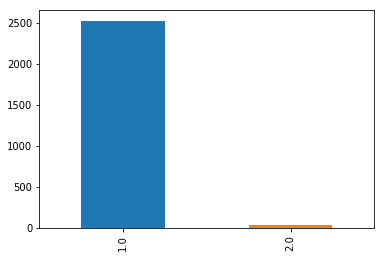

In [8]:
df.rlgblg.replace([7, 8, 9], np.nan, inplace=True)
df.rlgblg.value_counts().sort_index().plot(kind='bar')

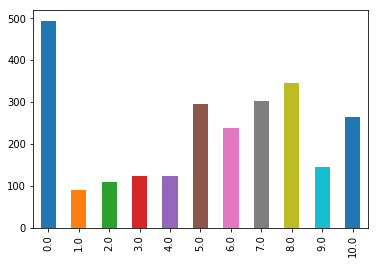

In [9]:
# How religious are you (0 = not at all...10 = Very religious)
df.rlgdgr.replace([77, 88, 99], np.nan, inplace=True)
df.rlgdgr.value_counts().sort_index().plot(kind='bar')

In [10]:
sum(df.rlgdgr.value_counts().sort_index()[0:5])

1234

In [11]:
sum(df.rlgdgr.value_counts().sort_index()[6:10])

1294

### Language spoken at home

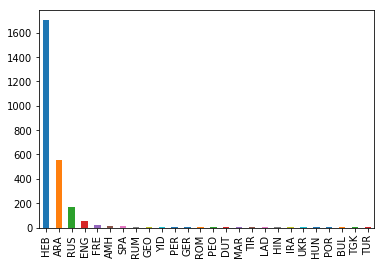

In [12]:
df['lnghom1'].value_counts().plot(kind='bar') #Language spoken at home

In [13]:
len(df[df['lnghom1']=='HEB'])  # Hebrew

1700

In [14]:
len(df[df['lnghom1']=='ARA'])  # Arabic

558

# Age distribution by language spoken at home

First the overall age distribution in the dataset.

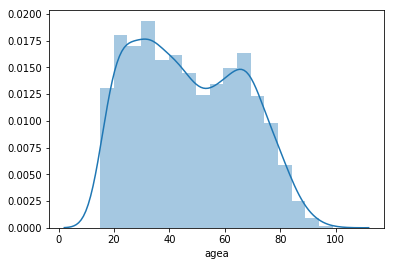

In [15]:
sns.distplot(df.agea.replace([999.0], np.nan).dropna())

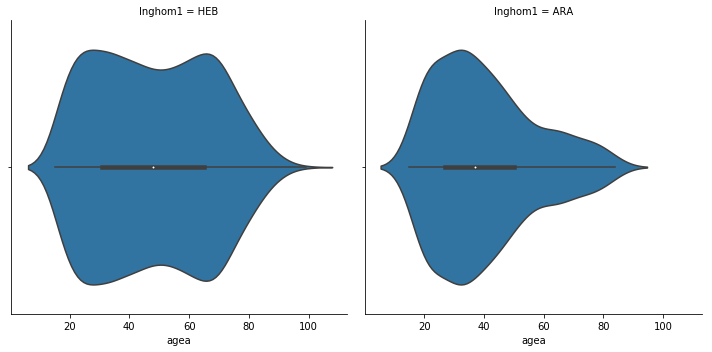

In [16]:
sns.catplot(x="agea",col="lnghom1",col_order=["HEB", "ARA"],kind="violin",data=df.replace([999.0], np.nan));

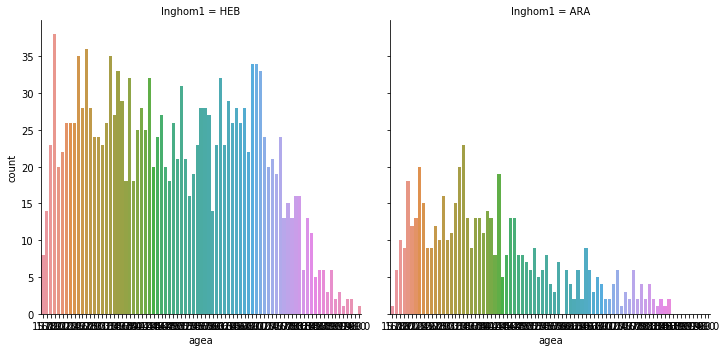

In [17]:
sns.catplot(x="agea",col="lnghom1",col_order=["HEB", "ARA"],kind="count",data=df.replace([999.0], np.nan));

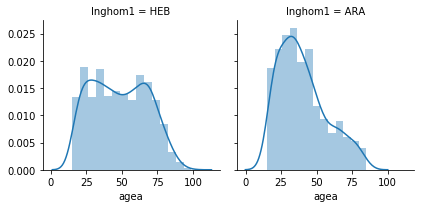

In [18]:
g = sns.FacetGrid(data=df.replace([999.0], np.nan), col='lnghom1',col_order=["HEB", "ARA"])
g.map(sns.distplot, "agea")

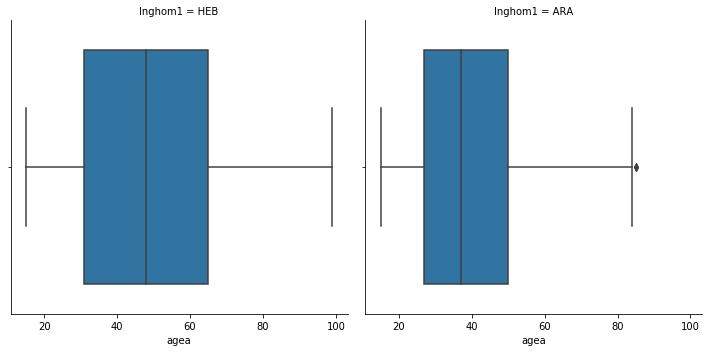

In [19]:
sns.catplot(x="agea",col="lnghom1",col_order=["HEB", "ARA"],kind="box",data=df.replace([999.0], np.nan));

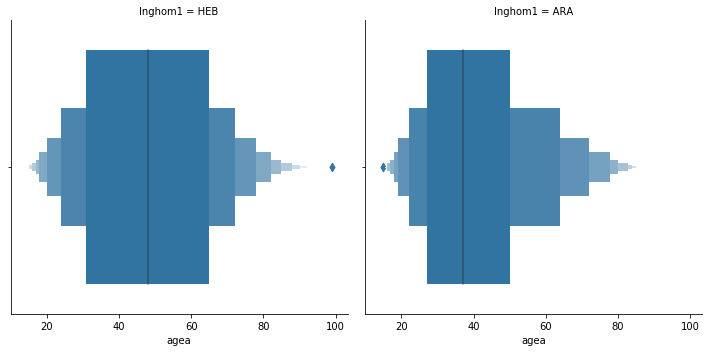

In [20]:
sns.catplot(x="agea",col="lnghom1",col_order=["HEB", "ARA"],kind="boxen",data=df.replace([999.0], np.nan));

We can see that the Arabic speakers are more dense in the center of the age distribution. The big difference is in the older population, which seems significantly less well represented. We should keep this in mind. Two points: this analysis did not take weights into account. Second: inutitively we expect older people to be more conformist (this should be easily checked with a simple regression), and since the Arabic speakers in the data set are in general more conformist than the Hebrew speakers in our analysis, adding the missing ae groups would only tilt the results more strongly in the same direction. 

## Household size

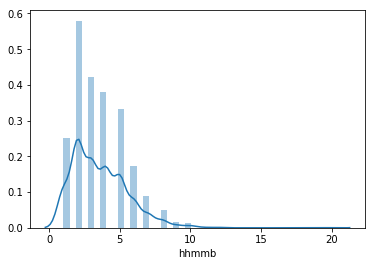

In [21]:
sns.distplot(df.hhmmb.replace([999.0], np.nan).dropna())

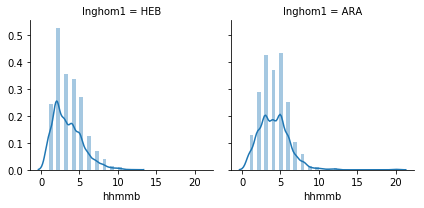

In [22]:
g = sns.FacetGrid(data=df.replace([999.0], np.nan), col='lnghom1',col_order=["HEB", "ARA"])
g.map(sns.distplot, "hhmmb")

Note: Both household size and age may potentially be both cause and effect of norms. Also, these distributions may be biased due to sampling.

# Human Values

In [23]:
def select_cols(df):
    vars='IPCRTIV,IMPRICH,IPEQOPT,IPSHABT,IMPSAFE,IMPDIFF,IPFRULE,IPUDRST,IPMODST,IPGDTIM,IMPFREE,IPHLPPL,IPSUCES,IPSTRGV,IPADVNT,IPBHPRP,IPRSPOT,IPLYLFR,IMPENV,IMPTRAD,IMPFUN'.lower()
    human_values_cols=vars.split(',')
    df = df[human_values_cols]
    return df

In [24]:
human_values_df=select_cols(df)

In [25]:
len(human_values_df[human_values_df.isin([7.0,8.0]).any(axis=1)]) / float(len(human_values_df)) # lines with refues (7), don't know(8)

0.15526007039499412

More than 15% of the respondents have at least one question without a meningful answer. That's quite a bit, but for simplicity I'm going to remove all these rows for the preliminary analysis.

In [26]:
human_values_clean_df=human_values_df[-human_values_df.isin([7.0,8.0]).any(axis=1)]

In [27]:
# Make sure we removed the right number of rows
(len(human_values_df)-len(human_values_clean_df))/float(len(human_values_df))

0.15526007039499412

In [28]:
human_values_clean_df.apply(max,axis=1)

0       5.0
1       6.0
2       5.0
3       5.0
4       5.0
6       5.0
7       6.0
8       6.0
9       6.0
10      5.0
11      5.0
12      5.0
13      5.0
14      5.0
15      5.0
16      6.0
17      5.0
18      5.0
19      6.0
20      5.0
21      5.0
22      5.0
23      6.0
25      6.0
26      5.0
27      6.0
28      6.0
29      5.0
30      5.0
31      6.0
       ... 
2525    4.0
2526    4.0
2527    4.0
2528    4.0
2529    5.0
2530    3.0
2531    6.0
2532    3.0
2534    4.0
2535    2.0
2536    3.0
2537    5.0
2538    5.0
2539    4.0
2540    4.0
2541    5.0
2542    5.0
2543    5.0
2544    5.0
2545    5.0
2546    5.0
2547    5.0
2549    5.0
2550    5.0
2551    5.0
2552    4.0
2553    4.0
2554    6.0
2555    5.0
2556    5.0
Length: 2160, dtype: float64

In [29]:
human_values_clean_df.idxmax(axis=1).value_counts()

imprich    643
ipcrtiv    270
ipadvnt    259
impdiff    199
ipfrule    171
imptrad    102
ipshabt     86
ipeqopt     83
impsafe     71
ipmodst     57
ipgdtim     36
ipbhprp     34
ipudrst     28
ipstrgv     20
iprspot     19
ipsuces     19
iphlppl     18
impenv      16
impfree     15
impfun       9
iplylfr      5
dtype: int64

What values do most Israelis least ascribe to themselves?

Top three: be rich, be creative, have adventures. Shouldn't these be top three for Israel to be  "the startup nation"?!

Bottom three: be indepdent, have fun, be loyal to friends and devoted to people close.  

Scale is: 1 - Very much like me... 6 = Not like me at all


### Center values

In [30]:
means=human_values_clean_df.apply(mean,axis=1)

In [31]:
human_values_clean_centered_df=human_values_clean_df.sub(means,axis=0)

Schwartz wants us to compute a score for each value as an average of the two questionaire items related to that value. If we do that we lose the distinction between ipfrule (importance of following rules) and ipbhprp (importance of behaving properly), since both index to conformity. So let's not do this yet. Let's do some exploring.

In [32]:
average(human_values_clean_centered_df['ipfrule'])

0.2455908289241622

In [33]:
average(human_values_clean_centered_df['ipbhprp'])

0.048368606701940035

In [34]:
average(human_values_clean_centered_df['imprich'])    

1.0057760141093475

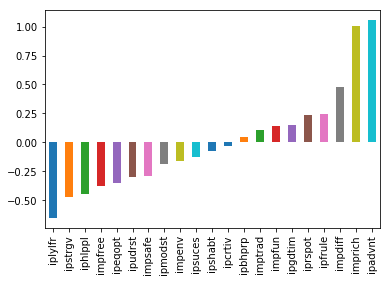

In [35]:
human_values_clean_centered_df.apply(average,axis=0).sort_values().plot(kind='bar')

Top three: Important to be loyal to friends and devoted to people close,  Important that government is strong and ensures safety, Important to help people and care for others well-being  

Bottom three: Important to try new and different things in life, be rich, have adventures

Note that some of these items index the same value. Without checking, I guess that having adventures and trying different things go together. Following rules (0.245) and behaving properly (0.048) likewise. Note how far the latter two are from each other.

# Weights

Let's repeat the religiosity analysis, this time applying weights. See https://www.europeansocialsurvey.org/docs/methodology/ESS_weighting_data_1.pdf

In [36]:
df['dweight'].describe()

count    2557.000000
mean        1.000000
std         0.481229
min         0.121871
25%         0.668427
50%         0.927427
75%         1.255172
max         3.380763
Name: dweight, dtype: float64

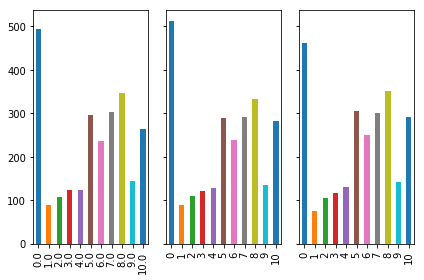

In [37]:
fig=plt.figure()
# left side, the old plot (see above)
ax1=fig.add_subplot(131)
df.rlgdgr.value_counts().sort_index().plot(kind='bar',ax=ax1)
# middle, new plot, counting each row contribution based in dweight (design weight)
ax2 = fig.add_subplot(132,sharey=ax1)
pd.Series([sum(df[df['rlgdgr']==float(r)].dweight) for r in range(0,11)]).plot(kind='bar',ax=ax2)
# right side, new plot, counting each row contribution based in pspwght (post-stratification weight)
ax3 = fig.add_subplot(133,sharey=ax1)
pd.Series([sum(df[df['rlgdgr']==float(r)].pspwght) for r in range(0,11)]).plot(kind='bar',ax=ax3)

fig.tight_layout()
plt.show()

Results don't seem remarkably different.

## Human values, weighted

In [38]:
def select_cols2(df):
    vars='IPCRTIV,IMPRICH,IPEQOPT,IPSHABT,IMPSAFE,IMPDIFF,IPFRULE,IPUDRST,IPMODST,IPGDTIM,IMPFREE,IPHLPPL,IPSUCES,IPSTRGV,IPADVNT,IPBHPRP,IPRSPOT,IPLYLFR,IMPENV,IMPTRAD,IMPFUN,PSPWGHT'.lower()
    human_values_cols=vars.split(',')
    df = df[human_values_cols]
    return df

In [39]:
human_values_clean_centered_weights_df=select_cols2(df)

In [40]:
human_values_clean_centered_weights_df=human_values_clean_centered_weights_df.replace([7.0, 8.0], np.nan)

In [41]:
vars='IPCRTIV,IMPRICH,IPEQOPT,IPSHABT,IMPSAFE,IMPDIFF,IPFRULE,IPUDRST,IPMODST,IPGDTIM,IMPFREE,IPHLPPL,IPSUCES,IPSTRGV,IPADVNT,IPBHPRP,IPRSPOT,IPLYLFR,IMPENV,IMPTRAD,IMPFUN'.lower()
human_values_cols=vars.split(',')

In [42]:
means2=human_values_clean_centered_weights_df[human_values_cols].apply(mean,axis=1)

In [43]:
human_values_clean_centered_weights_df[human_values_cols]=human_values_clean_centered_weights_df[human_values_cols].sub(means2,axis=0)

In [44]:
human_values_clean_centered_weighted_df=human_values_clean_centered_weights_df[human_values_cols].multiply(human_values_clean_centered_weights_df.pspwght,axis='index')

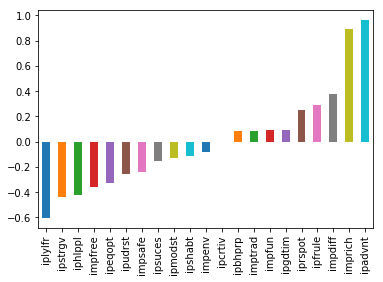

In [45]:
human_values_clean_centered_weighted_df.apply(np.nanmean,axis=0).sort_values().plot(kind='bar')

Top three: Important to be loyal to friends and devoted to people close,  Important that government is strong and ensures safety, Important to help people and care for others well-being  

Bottom three: Important to try new and different things in life, be rich, have adventures

This is almost exactly the same as before. Curiously, the one bar that seems a bit larger (less liked) now is ipbhprp (behaving properly).

In [46]:
human_values_clean_centered_weighted_df.apply(np.nanmean,axis=0).ipbhprp # weighted

0.08319747791179609

In [47]:
human_values_clean_centered_df.apply(average,axis=0).ipbhprp # unweighted

0.048368606701940035

In other words, the weighted data shows less importance in behaving properly.

In [48]:
weighted_values=human_values_clean_centered_weighted_df.apply(np.nanmean,axis=0)
unweighted_values=human_values_clean_centered_df.apply(average,axis=0)

In [49]:
(weighted_values - unweighted_values).sort_values()

imprich   -0.116966
impdiff   -0.096942
ipadvnt   -0.094327
ipgdtim   -0.060163
impfun    -0.050198
ipshabt   -0.034208
ipsuces   -0.018722
imptrad   -0.015253
iprspot    0.008325
impfree    0.017230
iphlppl    0.019479
ipeqopt    0.025922
ipcrtiv    0.027846
ipstrgv    0.031753
ipbhprp    0.034829
ipudrst    0.038627
ipfrule    0.046346
iplylfr    0.049475
impsafe    0.050073
ipmodst    0.059359
impenv     0.074469
dtype: float64

In [50]:
(abs(weighted_values - unweighted_values)/abs(unweighted_values)).sort_values()

iprspot    0.034681
iphlppl    0.043805
impfree    0.046031
ipstrgv    0.067472
ipeqopt    0.073624
iplylfr    0.075870
ipadvnt    0.089187
imprich    0.116294
ipudrst    0.129856
ipsuces    0.142628
imptrad    0.149430
impsafe    0.173462
ipfrule    0.188713
impdiff    0.204592
ipmodst    0.317739
impfun     0.356110
ipgdtim    0.398044
ipshabt    0.433309
impenv     0.470984
ipbhprp    0.720072
ipcrtiv    0.917948
dtype: float64

Largest relative change is in ipcrtiv (creativity), ipbhprp (behaving properly), impenv (importance of the environment).  ipfrule changed much less, suggesting that weighting might be important for analysis of ipfrule vis-a-vis ipbhprp.

## The Ten Dimensions 

The ESS model is based on ten values, each indexed by two (or three) questions on values. 

In [51]:
human_values_clean_centered_weighted_df['SELF-DIRECTION']=(human_values_clean_centered_weighted_df['ipcrtiv']+human_values_clean_centered_weighted_df['impfree'])/2.0

In [52]:
human_values_clean_centered_weighted_df['POWER']=(human_values_clean_centered_weighted_df['imprich']+human_values_clean_centered_weighted_df['iprspot'])/2.0

In [53]:
human_values_clean_centered_weighted_df['UNIVERSALISM']=(human_values_clean_centered_weighted_df['ipeqopt']+
                                                                human_values_clean_centered_weighted_df['ipudrst']+
                                                                human_values_clean_centered_weighted_df['impenv'])/3.0                                                          

In [54]:
human_values_clean_centered_weighted_df['ACHIEVMENT']=(human_values_clean_centered_weighted_df['ipshabt']+
                                                              human_values_clean_centered_weighted_df['ipsuces'])/2.0

In [55]:
human_values_clean_centered_weighted_df['SECURITY']=(human_values_clean_centered_weighted_df['impsafe']+
                                                            human_values_clean_centered_weighted_df['ipstrgv'])/2.0

In [56]:
human_values_clean_centered_weighted_df['STIMULATION']=(human_values_clean_centered_weighted_df['impdiff']+
                                                               human_values_clean_centered_weighted_df['ipadvnt'])/2.0

In [57]:
human_values_clean_centered_weighted_df['CONFORMITY']=(human_values_clean_centered_weighted_df['ipfrule']+
                                                              human_values_clean_centered_weighted_df['ipbhprp'])/2.0

In [58]:
human_values_clean_centered_weighted_df['TRADITION']=(human_values_clean_centered_weighted_df['ipmodst']+
                                                             human_values_clean_centered_weighted_df['imptrad'])/2.0

In [59]:
human_values_clean_centered_weighted_df['HEDONISM']=(human_values_clean_centered_weighted_df['ipgdtim']+
                                                            human_values_clean_centered_weighted_df['impfun'])/2.0

In [60]:
human_values_clean_centered_weighted_df['BENEVOLENCE']=(human_values_clean_centered_weighted_df['iphlppl']+
                                                               human_values_clean_centered_weighted_df['iplylfr'])/2.0

In [61]:
human_values_dimensions_df=human_values_clean_centered_weighted_df[['SELF-DIRECTION','POWER','UNIVERSALISM','ACHIEVMENT','SECURITY',
                                                                'STIMULATION','CONFORMITY','TRADITION','HEDONISM','BENEVOLENCE']]

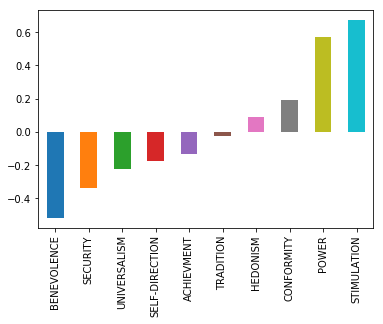

In [62]:
human_values_dimensions_df.apply(np.nanmean,axis=0).sort_values().plot(kind='bar')

### Pair plot of the ten human values dimensions

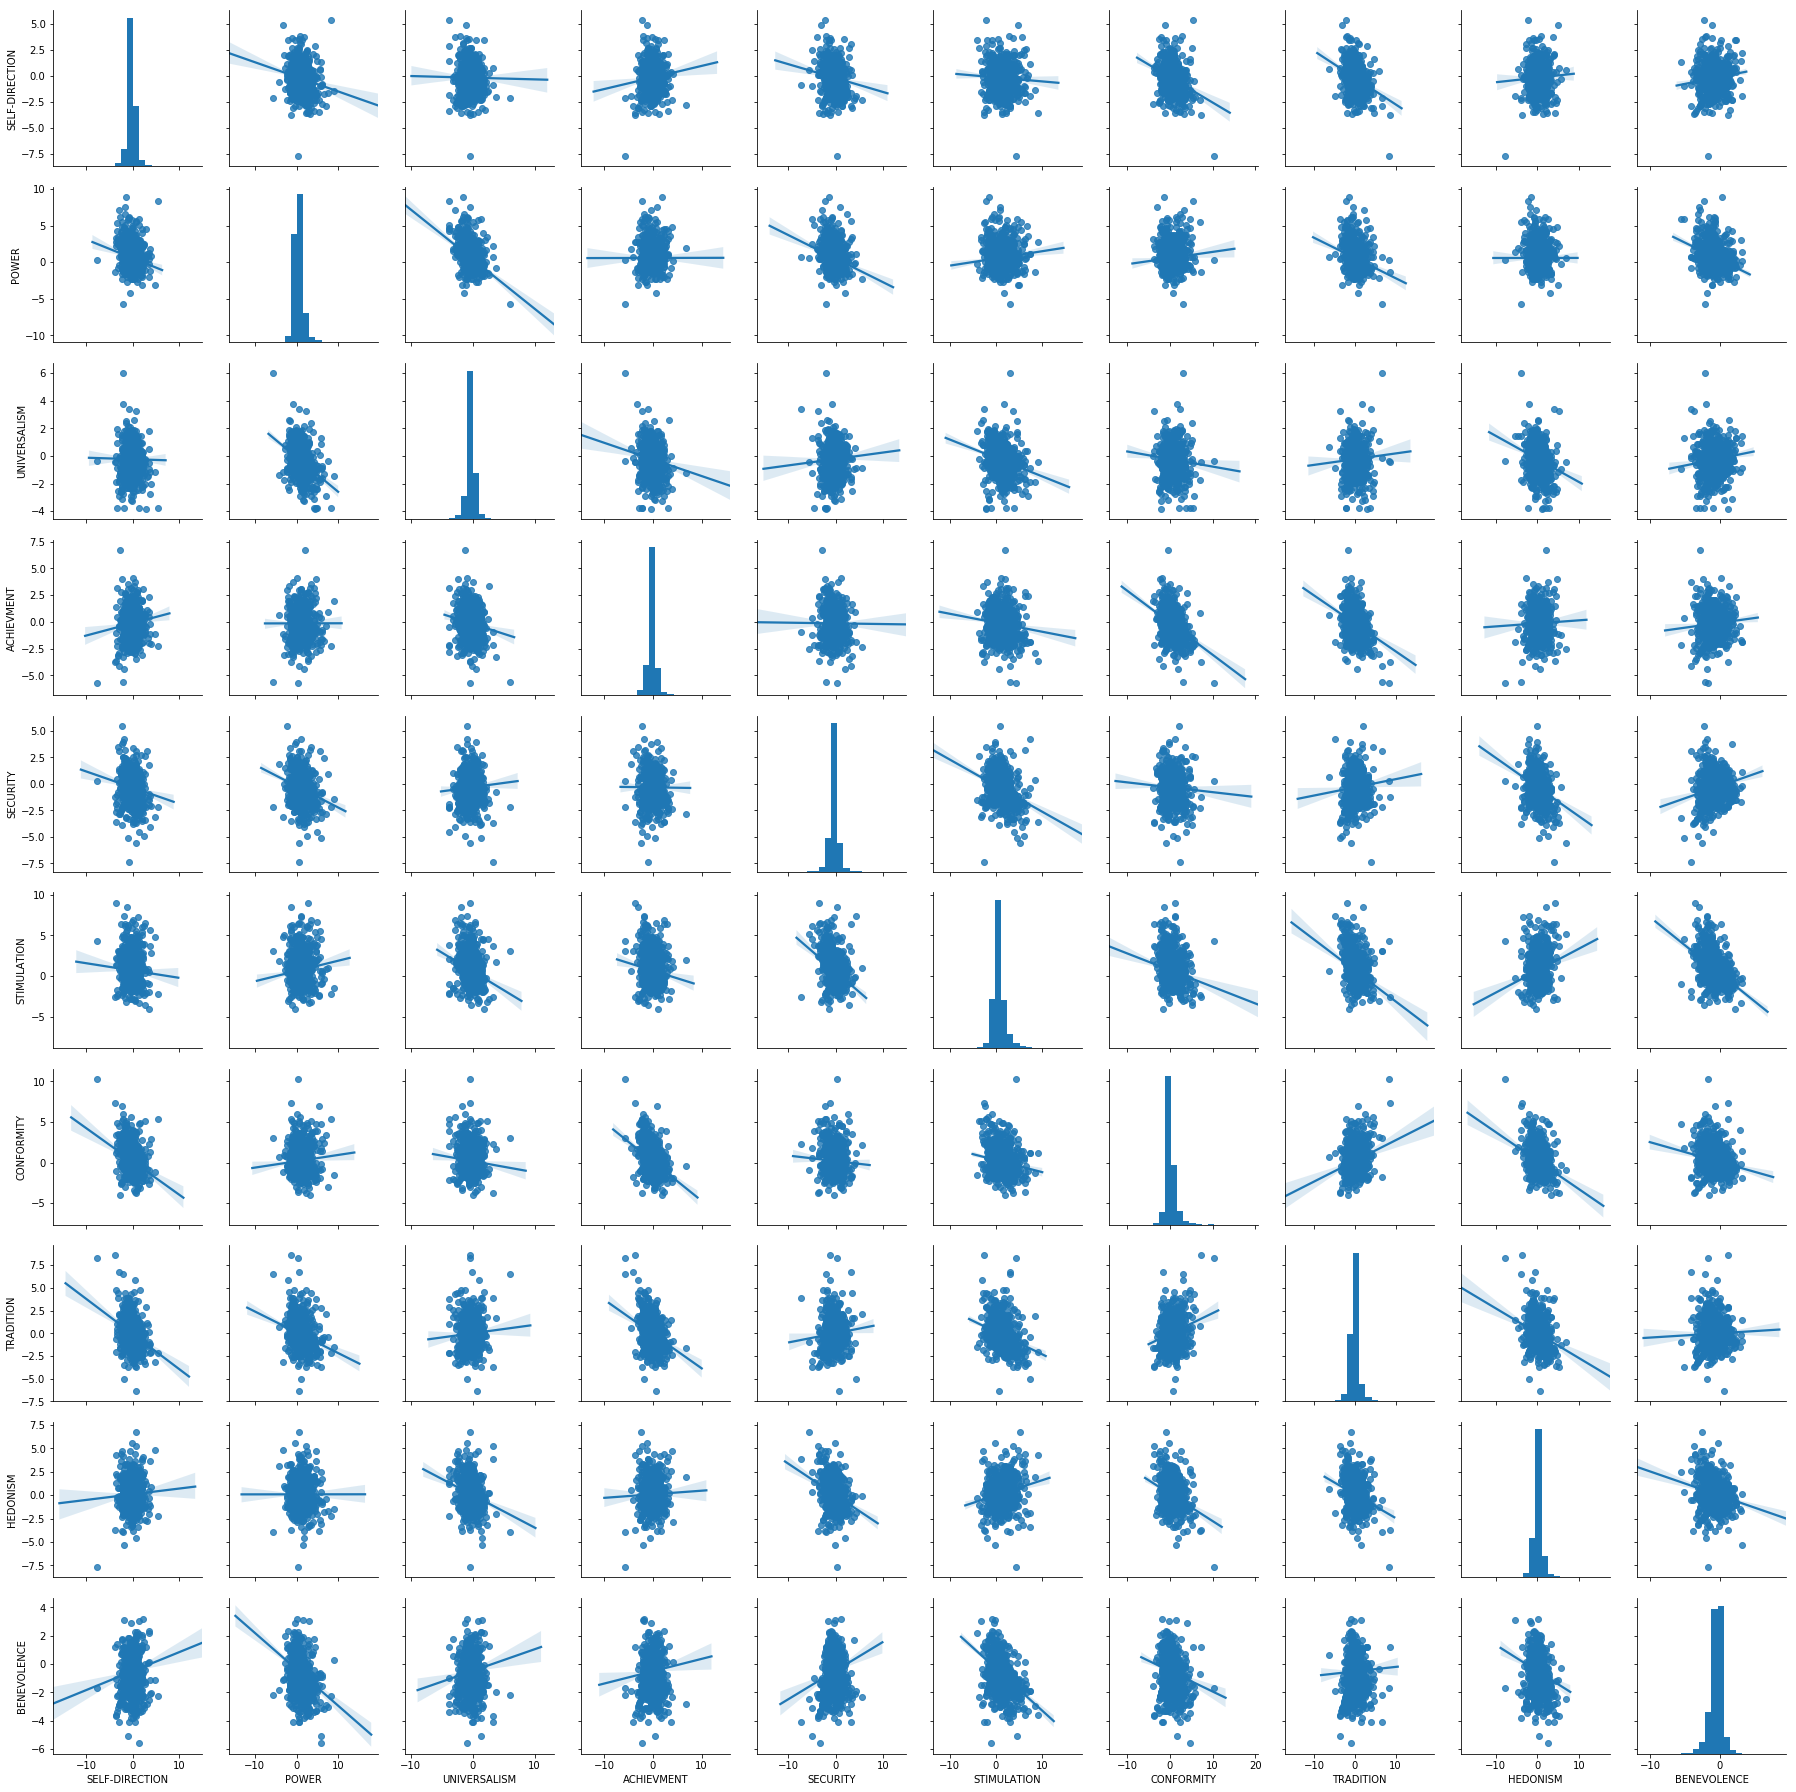

In [63]:
sns.pairplot(human_values_dimensions_df.dropna(),kind="reg");

## By social group

In [64]:
full_human_values_df=df.join(human_values_clean_centered_weighted_df,rsuffix='HV')

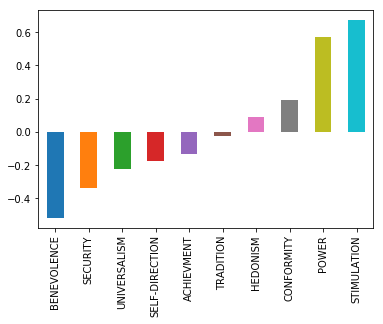

In [65]:
# Sanity check: the following should give exactly the same result as before
full_human_values_df[['SELF-DIRECTION','POWER','UNIVERSALISM','ACHIEVMENT','SECURITY',
                                                                'STIMULATION','CONFORMITY','TRADITION','HEDONISM','BENEVOLENCE']].apply(np.nanmean,axis=0).sort_values().plot(kind='bar')

### By religiosity

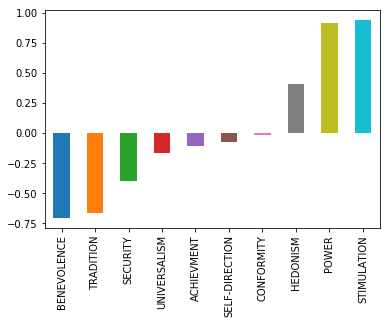

In [66]:
full_human_values_df[full_human_values_df['rlgdgr']==10.0][['SELF-DIRECTION','POWER','UNIVERSALISM','ACHIEVMENT','SECURITY',
                                                                'STIMULATION','CONFORMITY','TRADITION','HEDONISM','BENEVOLENCE']].apply(np.nanmean,axis=0).sort_values().plot(kind='bar')

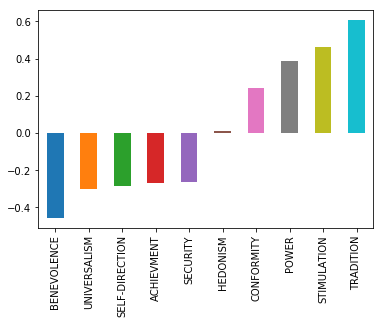

In [67]:
full_human_values_df[full_human_values_df['rlgdgr']==0.0][['SELF-DIRECTION','POWER','UNIVERSALISM','ACHIEVMENT','SECURITY',
                                                                'STIMULATION','CONFORMITY','TRADITION','HEDONISM','BENEVOLENCE']].apply(np.nanmean,axis=0).sort_values().plot(kind='bar')

Interesting differences between the very religious and the non-religious. 

### By language spoken at home

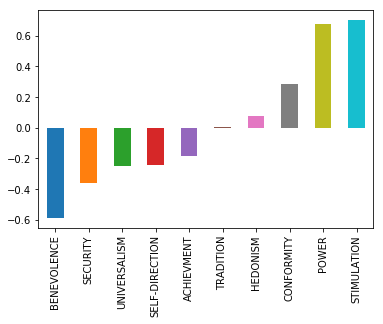

In [68]:
full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['SELF-DIRECTION','POWER','UNIVERSALISM','ACHIEVMENT','SECURITY',
                                                                'STIMULATION','CONFORMITY','TRADITION','HEDONISM','BENEVOLENCE']].apply(np.nanmean,axis=0).sort_values().plot(kind='bar')

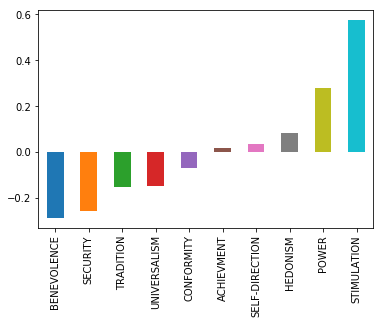

In [69]:
full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['SELF-DIRECTION','POWER','UNIVERSALISM','ACHIEVMENT','SECURITY',
                                                                'STIMULATION','CONFORMITY','TRADITION','HEDONISM','BENEVOLENCE']].apply(np.nanmean,axis=0).sort_values().plot(kind='bar')

So it seems that the more religious value tradition more (as you'd expect), but there's no change in the value assigned to conformity. _However_, when we compare Hebrew speakers and Arabic speakers, the Arabic speakers value tradition more (as expected) _and also value conformity more_. Thus, the predictor is social location, culture, etc., not religiosity per se!

In [70]:
full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['ipfruleHV']].apply(np.nanmean)

ipfruleHV    0.402684
dtype: float64

In [71]:
full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['ipbhprpHV']].apply(np.nanmean)

ipbhprpHV    0.161583
dtype: float64

In [72]:
full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['ipfruleHV']].apply(np.nanmean)

ipfruleHV   -0.059006
dtype: float64

In [73]:
full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['ipbhprpHV']].apply(np.nanmean)

ipbhprpHV   -0.089186
dtype: float64

In [74]:
0.40/0.16

2.5

In [75]:
-0.09/-0.06

1.5

**In general, Hebrew speakers value conformity less, according to both items (rule following and proper behavior). However,  Hebrew speakers care about proper behavior about 2.5 more than rule following, while Arabic speakers only 1.5 as much.**

In [76]:
0.4/-0.06

-6.666666666666667

In [77]:
0.16/-0.09

-1.777777777777778

The much bigger difference between the two groups is in the answer to the rule following question.

In [78]:
full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['ipfruleHV']].apply(np.std)

ipfruleHV    0.7045
dtype: float64

In [79]:
full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['ipfruleHV']].apply(np.std)

ipfruleHV    1.706039
dtype: float64

In [80]:
full_human_values_df[['ipfruleHV']].apply(np.std)

ipfruleHV    1.53078
dtype: float64

There's a big difference in sd, so not sure if using a pooled sd is appropriate.

In [81]:
(full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['ipfruleHV']].apply(np.nanmean)-


 full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['ipfruleHV']].apply(np.nanmean))/full_human_values_df[['ipfruleHV']].apply(np.std)

ipfruleHV    0.301604
dtype: float64

The difference between Hebrew speakers and Arabic speakers in ipfrule is 0.3 standard deviations. Smallish?

In [82]:
(full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['ipbhprpHV']].apply(np.nanmean)-
 full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['ipbhprpHV']].apply(np.nanmean))/full_human_values_df[['ipbhprpHV']].apply(np.std)

ipbhprpHV    0.194569
dtype: float64

The difference between Hebrew speakers and Arabic speakers in ipbhprp is 0.2 standard deviations. Small.

In [83]:
# https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python#33002123
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [84]:
cohen_d(full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['ipbhprpHV']],full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['ipbhprpHV']])

ipbhprpHV    0.194561
dtype: float64

In [85]:
cohen_d(full_human_values_df[full_human_values_df['lnghom1']=='HEB'][['ipfruleHV']],full_human_values_df[full_human_values_df['lnghom1']=='ARA'][['ipfruleHV']])

ipfruleHV    0.303368
dtype: float64

Same as above, the difference in ipbhprp is smaller than the difference in ipfrule, both effect sizes are small, then one for ipfrule closer to medium (0.3). Next we repeat the analysis for the original data, not centered nor weighted.

In [86]:
cohen_d(df[df['lnghom1']=='HEB'][['ipfrule']],df[df['lnghom1']=='ARA'][['ipfrule']])

ipfrule    0.72254
dtype: float64

Looked this way the effect is a medium-large from ipfrule

In [87]:
cohen_d(df[df['lnghom1']=='HEB'][['ipbhprp']],df[df['lnghom1']=='ARA'][['ipbhprp']])

ipbhprp    0.634237
dtype: float64

Looked this way the effect is a medium from ipbhprp

The effect size (Cohen's d) is large for both conformitiy items between non-religious Hebrew speakers and Arabic speakers. Again, consistent with all previous tests, ipfrule shows the larger difference. 

## Visualizing rule following, proper behavior accross social groups

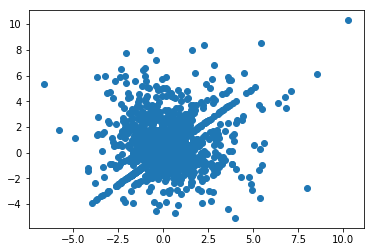

In [88]:
plt.scatter(full_human_values_df['ipbhprpHV'],full_human_values_df['ipfruleHV'], label='True Position')  

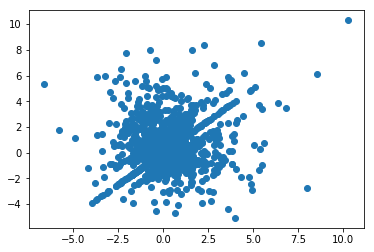

In [89]:
plt.scatter(full_human_values_df[full_human_values_df['lnghom1']=='HEB']['ipbhprpHV'],full_human_values_df[full_human_values_df['lnghom1']=='HEB']['ipfruleHV'], label='True Position')  


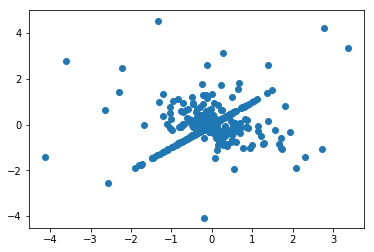

In [90]:
plt.scatter(full_human_values_df[full_human_values_df['lnghom1']=='ARA']['ipbhprpHV'],full_human_values_df[full_human_values_df['lnghom1']=='ARA']['ipfruleHV'], label='True Position')  

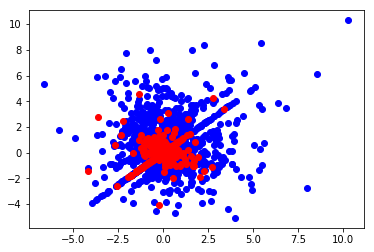

In [91]:
plt.scatter(full_human_values_df[full_human_values_df['lnghom1']=='HEB']['ipbhprpHV'],full_human_values_df[full_human_values_df['lnghom1']=='HEB']['ipfruleHV'], color='b')  
plt.scatter(full_human_values_df[full_human_values_df['lnghom1']=='ARA']['ipbhprpHV'],full_human_values_df[full_human_values_df['lnghom1']=='ARA']['ipfruleHV'], color='r')
plt.show()

### Joint plot
#### Entire population

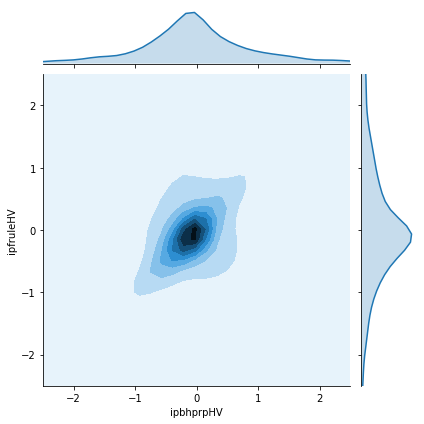

In [92]:
sns.jointplot(x="ipbhprpHV", y="ipfruleHV",kind="kde",xlim=(-2.5,2.5),ylim=(-2.5,2.5),data=full_human_values_df)


#### Hebrew speakers

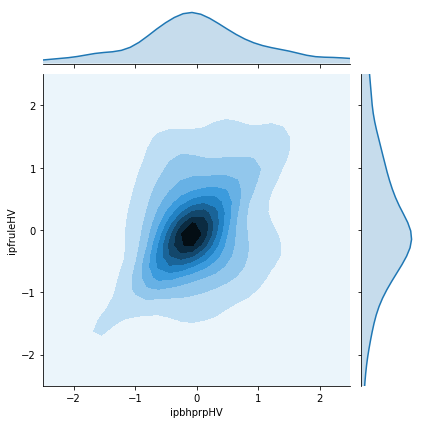

In [93]:
sns.jointplot(x="ipbhprpHV", y="ipfruleHV",kind="kde",xlim=(-2.5,2.5),ylim=(-2.5,2.5),data=full_human_values_df[full_human_values_df['lnghom1']=='HEB']);

#### Arabic speakers

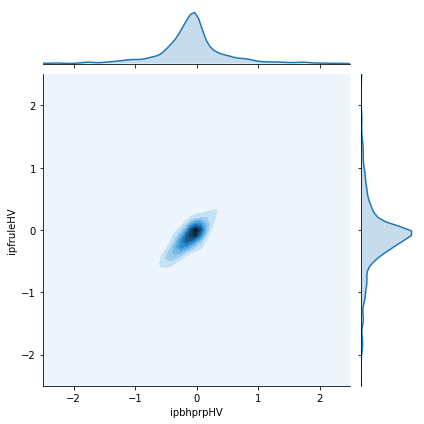

In [94]:
sns.jointplot(x="ipbhprpHV", y="ipfruleHV",kind="kde",xlim=(-2.5,2.5),ylim=(-2.5,2.5),data=full_human_values_df[full_human_values_df['lnghom1']=='ARA']);

## Different language communities

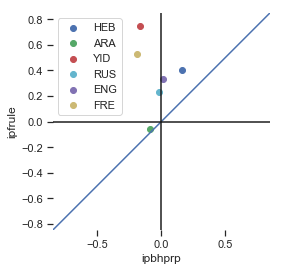

In [95]:
sns.set(style='ticks')
for lang, c in zip(['HEB','ARA','YID','RUS','ENG','FRE'],['b', 'g', 'r', 'c', 'm', 'y', 'k']):
    plt.scatter(np.nanmean(full_human_values_df[full_human_values_df['lnghom1']==lang]['ipbhprpHV']),
            np.nanmean(full_human_values_df[full_human_values_df['lnghom1']==lang]['ipfruleHV']),
            label=lang,
            color=c) 
plt.plot([-0.85,0.85],[-0.85,0.85])
plt.xlim(-0.85, 0.85)
plt.ylim(-0.85, 0.85)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('ipbhprp')
plt.ylabel('ipfrule')
plt.legend(loc='upper left')
plt.axhline(0, color='k')
plt.axvline(0, color='k')
sns.despine(left=True,bottom=True)

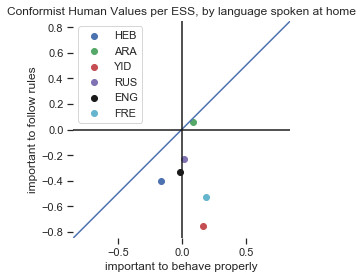

In [96]:
# reverse coding, explanatory lables
sns.set(style='ticks')
for lang, c in zip(['HEB','ARA','YID','RUS','ENG','FRE'],['b', 'g', 'r', 'm', 'k', 'c', 'y']):
    plt.scatter(-1.0*np.nanmean(full_human_values_df[full_human_values_df['lnghom1']==lang]['ipbhprpHV']),
                -1.0*np.nanmean(full_human_values_df[full_human_values_df['lnghom1']==lang]['ipfruleHV']),
                label=lang,
                color=c) 
plt.plot([-0.85,0.85],[-0.85,0.85])
plt.xlim(-0.85, 0.85)
plt.ylim(-0.85, 0.85)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('important to behave properly')
plt.ylabel('important to follow rules')
plt.title('Conformist Human Values per ESS, by language spoken at home')
plt.legend(loc='upper left')
plt.axhline(0, color='k')
plt.axvline(0, color='k')
sns.despine(left=True,bottom=True)
#savefig('fig1.png', bbox_inches='tight')

**The remarkable difference between ARA and HEB are what we focus on. It is also worthwhile to note the difference btween Arabic and Yiddhish (in red), which is spoken by the ultra-Orthodox Jews, another traditional, more coformist, minority group. The results are almost identical for proper behavior, but remarkably different for following rules. Another interesting comparison: English and French speakers.**

In [97]:
from scipy.stats import ttest_ind
ttest_ind(full_human_values_df[full_human_values_df['lnghom1']=='HEB']['ipfruleHV'],
          full_human_values_df[full_human_values_df['lnghom1']=='ARA']['ipfruleHV'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=8.753358707842882, pvalue=4.247148838066632e-18)

In [98]:
ttest_ind(full_human_values_df[full_human_values_df['lnghom1']=='HEB']['ipbhprpHV'],
          full_human_values_df[full_human_values_df['lnghom1']=='ARA']['ipbhprpHV'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=5.421319780905213, pvalue=6.655263191696107e-08)

Clearly both ipbhprpHV and ipfruleHV have different means in the two populations (statistically significant).

## Distributions

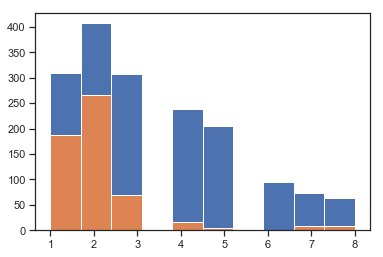

In [99]:
data=df[df['lnghom1']=='HEB']['ipfrule'].dropna()
plt.hist(data)
data=df[df['lnghom1']=='ARA']['ipfrule'].dropna()
plt.hist(data)
plt.show()

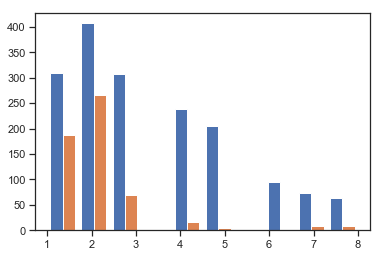

In [100]:
data1=df[df['lnghom1']=='HEB']['ipfrule'].dropna()
data2=df[df['lnghom1']=='ARA']['ipfrule'].dropna()
plt.hist([data1,data2])
plt.show()

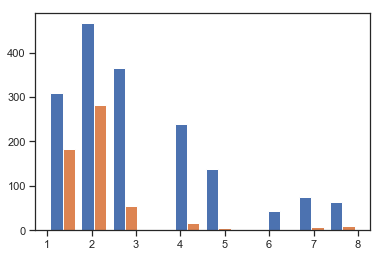

In [101]:
data1=df[df['lnghom1']=='HEB']['ipbhprp'].dropna()
data2=df[df['lnghom1']=='ARA']['ipbhprp'].dropna()
plt.hist([data1,data2])
plt.show()